In [1]:
import openamundsen as oa
import xarray as xr

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Run Model

In [2]:
config = oa.read_config('open_amundsen_config.yml')  # read in configuration file
model = oa.OpenAmundsen(config)  # create OpenAmundsen object and populate unspecified parameters with default values

In [3]:
model.initialize()  # read in input data files, initialize state variables etc.

2025-02-10 11:30:46 | INFO     | Initializing model grid
2025-02-10 11:30:46 | INFO     | Grid has dimensions 836x655
2025-02-10 11:30:46 | INFO     | Reading DEM (../data/openamundsen/dem_uppereastriver_50.asc)
2025-02-10 11:30:46 | INFO     | Reading sky view factor (../data/openamundsen/svf_uppereastriver_50.asc)
2025-02-10 11:30:46 | INFO     | Reading ROI (../data/openamundsen/roi_uppereastriver_50.asc)
2025-02-10 11:30:46 | INFO     | Reading meteo file: ../data/openamundsen/1.csv
2025-02-10 11:30:46 | INFO     | Correcting station precipitation with method: wmo
2025-02-10 11:30:46 | INFO     | Calculating terrain parameters


In [4]:
model.run()  # run the model

2025-02-10 11:30:46 | INFO     | Starting model run
2025-02-10 11:30:46 | INFO     | Processing time step 2022-11-16 00:00
2025-02-10 11:30:46 | INFO     | Processing time step 2022-11-16 03:00
2025-02-10 11:30:46 | INFO     | Processing time step 2022-11-16 06:00
2025-02-10 11:30:46 | INFO     | Processing time step 2022-11-16 09:00
2025-02-10 11:30:47 | INFO     | Processing time step 2022-11-16 12:00
2025-02-10 11:30:47 | INFO     | Processing time step 2022-11-16 15:00
2025-02-10 11:30:47 | INFO     | Processing time step 2022-11-16 18:00
2025-02-10 11:30:47 | INFO     | Processing time step 2022-11-16 21:00
2025-02-10 11:30:47 | INFO     | Processing time step 2022-11-17 00:00
2025-02-10 11:30:47 | INFO     | Processing time step 2022-11-17 03:00
2025-02-10 11:30:47 | INFO     | Processing time step 2022-11-17 06:00
2025-02-10 11:30:47 | INFO     | Processing time step 2022-11-17 09:00
2025-02-10 11:30:47 | INFO     | Processing time step 2022-11-17 12:00
2025-02-10 11:30:48 | INF

In [5]:
ls openamundsen_results/

output_grids.nc       output_timeseries.nc


# Examine results

**something is wrong with the input precip inputs - they are getting doubled somehow**

In [16]:
results = xr.open_dataset("openamundsen_results/output_timeseries.nc")

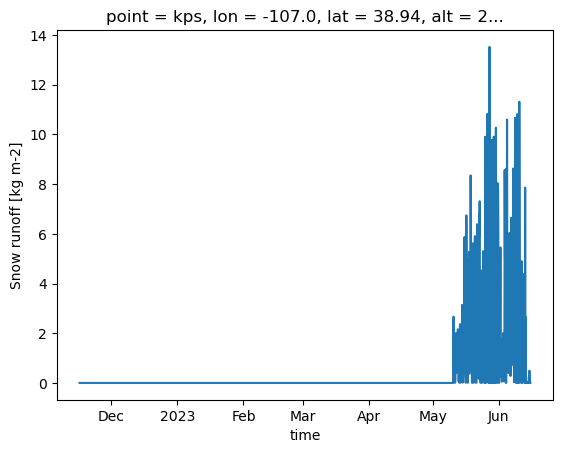

In [17]:
results.runoff.sel(point='kps').plot()


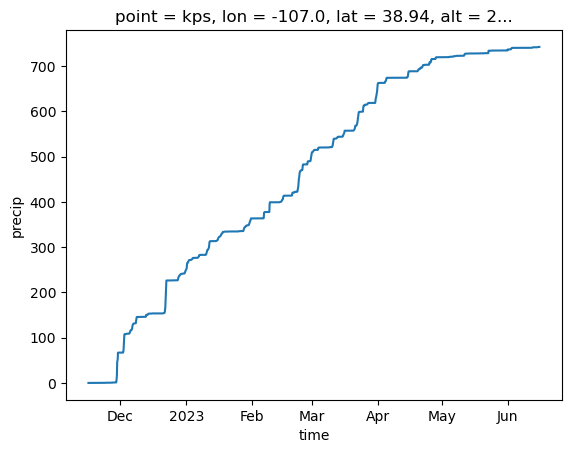

In [18]:
results.precip.sel(point='kps').cumsum().plot()

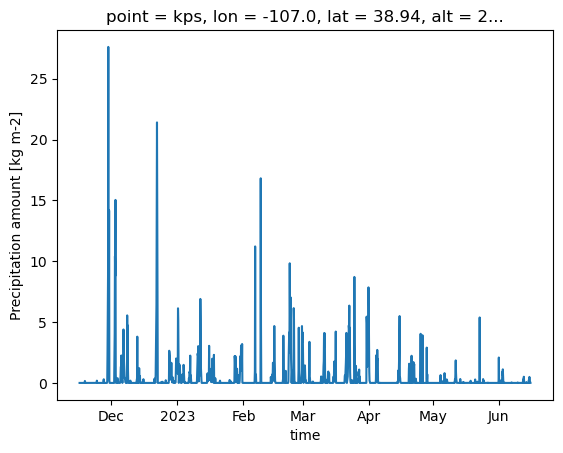

In [19]:
results.precip.sel(point='kps').plot()

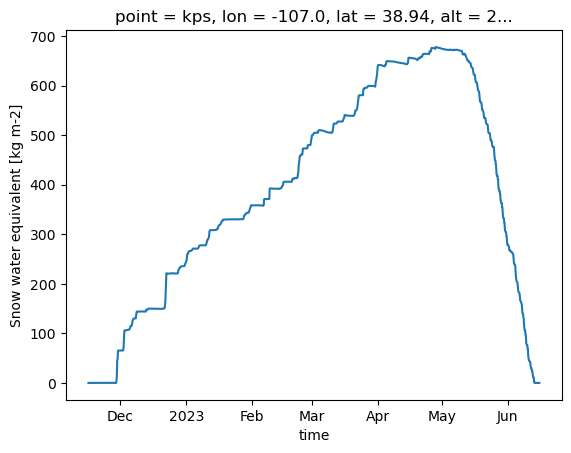

In [20]:
results.swe.sel(point='kps').plot()

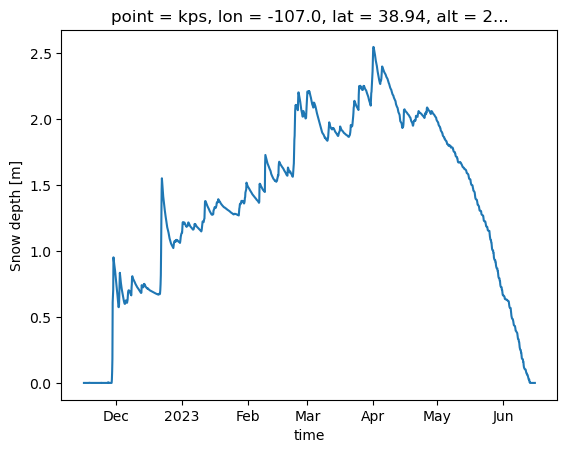

In [21]:
results['snow_depth'].sel(point='kps').plot()

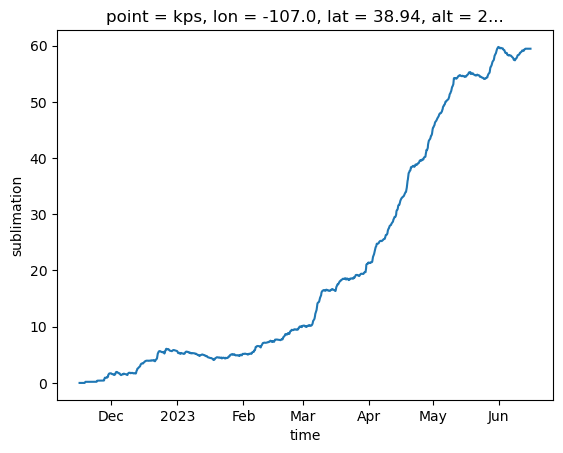

In [23]:
results['sublimation'].sel(point='kps').cumsum().plot()

In [24]:
results = xr.open_dataset("openamundsen_results/output_grids.nc")

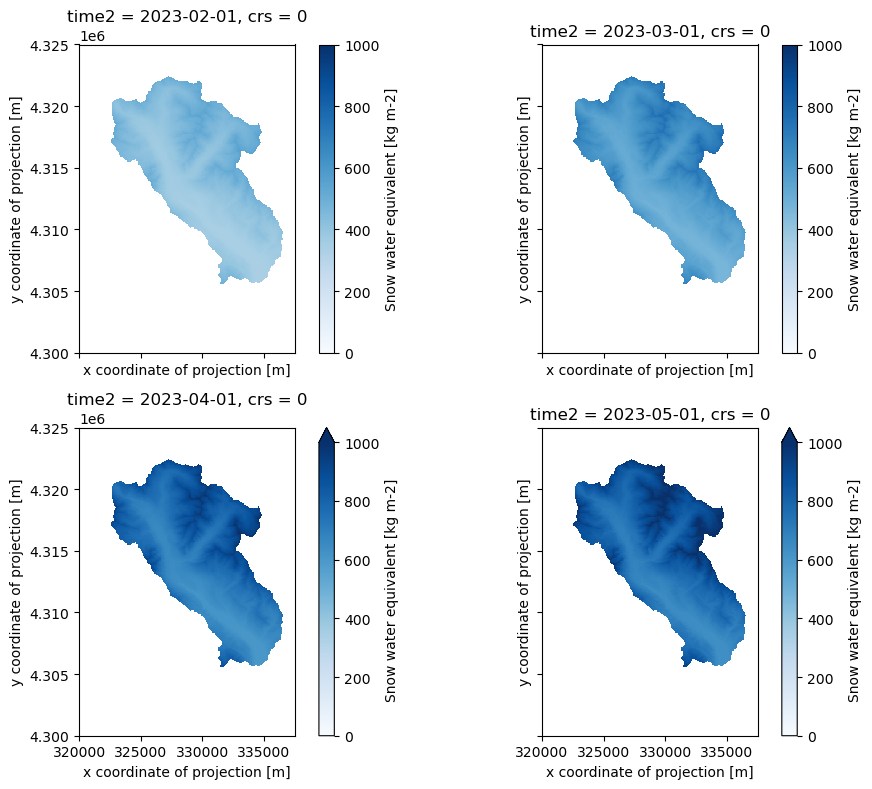

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)

# Plot for February
axes[0, 0].set_title('February')
results['swe'].sel(time2='2023-02-01T00:00:00.000000000').plot(ax=axes[0, 0], cmap='Blues', vmin=0, vmax=1000)

# Plot for March
axes[0, 1].set_title('March')
results['swe'].sel(time2='2023-03-01T00:00:00.000000000').plot(ax=axes[0, 1], cmap='Blues', vmin=0, vmax=1000)

# Plot for April
axes[1, 0].set_title('April')
results['swe'].sel(time2='2023-04-01T00:00:00.000000000').plot(ax=axes[1, 0], cmap='Blues', vmin=0, vmax=1000)

# Plot for May
axes[1, 1].set_title('May')
results['swe'].sel(time2='2023-05-01T00:00:00.000000000').plot(ax=axes[1, 1], cmap='Blues', vmin=0, vmax=1000)

# Add a shared colorbar
# fig.colorbar(axes[0, 0].collections[0], ax=axes, location='right', pad=0.05)

for ax in axes.flatten():
    ax.set_xlim(320000, 337500)
    ax.set_ylim(4300000, 4325000)
    ax.set_aspect('equal')
plt.tight_layout()
plt.show()